# Regularization

In linear regression we minimize the cost/loss function so as to get the 'line of best fit' - the model with the best performance, by choosing a coefficient `ai` for each feature variable.

However, if we allow these coefficients to be too large we end up with a model that ends up **overfitting** the data - will not generalize well with unknown data. This problem is exacerbated when dealing with datasets with a large number of features.

It's thus common practice to penalize large coefficients, or **regularize**, to over come this issue. There are a number of **regularization** techniques:

## Ridge Regression

The loss function is the std loss function **plus** the square of value of each `ai` coefficient multiplied by constant `alpha`.

![Linear Regression](../imgs/linear-regression-4.png)

When minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude(both positive and negative). `alpha` is a parameter we need to choose, like the `k` (neighbour) value for a knn model, picking  a value which results in the best fit. this is called **hyper-parameter tuning**. `Alpha` (also called `lambda`) controls model complexity.

When `alpha` == 0, we get back the std loss function. Which can lead to overfitting since we will not be taking into account large coefficients.

A very high `alpha` means that large coefficients are significantly penalized. This can lead to a simplified model and **underfitting**.

### Using Sklearn to implement Ridge Regularization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split;

In [3]:
# prepare our X and y sets
df = pd.read_csv('../data/boston.csv')
X = df.drop('MEDV', axis=1).values
y = df.MEDV.values
print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (506, 13)
<class 'numpy.ndarray'> (506,)


In [4]:
y = y.reshape(-1, 1)
print(y.shape)

(506, 1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# set alpha, ensure all variables are on the same scale through 'normalize=True'
ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.6996938275127311

The `R^2` for the same dataset using an out of the box linear regression model was 0.71

## Lasso Regression

The loss function is the std loss function **plus** the absolute value of ach coefficient multiplied by constant `alpha`.

![Linear Regression](../imgs/linear-regression-4.png)

### Using Sklearn to implement Lasso Regression

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split;

In [11]:
# prepare our X and y sets
df = pd.read_csv('../data/boston.csv')
X = df.drop('MEDV', axis=1).values
y = df.MEDV.values
print(type(X), X.shape)

y = y.reshape(-1, 1)
print(type(y), y.shape)

<class 'numpy.ndarray'> (506, 13)
<class 'numpy.ndarray'> (506, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.5950229535328551

One of the best features of **lasso** regression is that it allows you to identify those features within a dataset that contribute most to wards the prediction. This is due to the fact that it tends to shrink the coefficients of the less important features to be exactly `0`. The other features are selected by the algorithm.

When can identify the most important features using sklearn and the `Lasso` function

In [15]:
# extract all the features names
names = df.drop('MEDV', axis=1).columns
print(names)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [19]:
# extract the coefficient value  for each feature
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X, y).coef_
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

Plot the coefficients as a function of feature name:

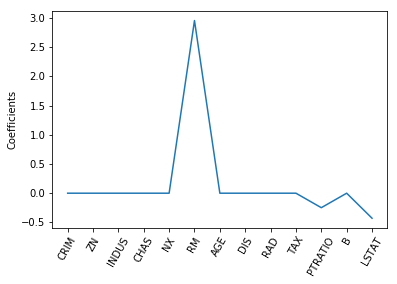

In [20]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show();

We can see that the most important predictor for our target variable(housing price) is `RM`, number of rooms in the property. The other features have been shrunk towards `0`.

### Determine the most important features for the Gapminder dataset

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split;

In [23]:
# prepare the data
data = pd.read_csv('../data/gyn_2008_region.csv')
X_life = data.drop(['life', 'Region'], axis=1).values
y_life = data.life.values
print(type(X_life), X_life.shape)

y_life = y_life.reshape(-1, 1)
print(type(y_life), y_life.shape)

<class 'numpy.ndarray'> (139, 8)
<class 'numpy.ndarray'> (139, 1)


In [30]:
X_life

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.2314000e+04,
        1.2990490e+02, 2.9500000e+01],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 7.1030000e+03,
        1.3012470e+02, 1.9200000e+02],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 1.4646000e+04,
        1.1889150e+02, 1.5400000e+01],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 4.0850000e+03,
        1.2193670e+02, 2.6200000e+01],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 3.0390000e+03,
        1.3244930e+02, 9.4900000e+01],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 1.2860000e+03,
        1.3197450e+02, 9.8300000e+01]])

In [25]:
# extract all feature names
names_life = data.drop(['life', 'Region'], axis=1).columns
names_life

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [31]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_life, y_life)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
# extract the coefficient values for each feature
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


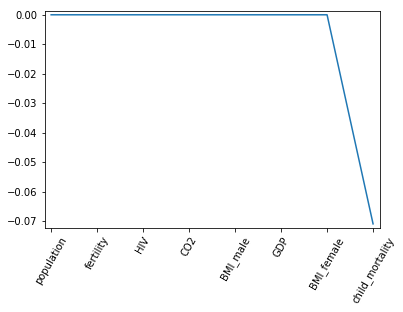

In [33]:
# Plot the coefficients
plt.plot(range(len(names_life)), lasso_coef)
plt.xticks(range(len(names_life)), names_life, rotation=60)
plt.margins(0.02)
plt.show();

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

## Regularization

Lasso is great for feature selection, but when building regression models, **Ridge regression** should be your **first choice**.